#### **1. Importando Pacote e módulos necessários**

Instalação dos módulos necessários.

In [ ]:
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib
!pip install aisp

In [1]:
# Importando a seleção negativa.
from aisp.NSA import RNSA

# Importando os demais pacotes. 
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### 2. Iniciando o modelo e aplicando-o em amostras geradas aleatoriamente para testar o desempenho do classificador raio fixo.

In [2]:
# Iniciando a classe.
nsa = RNSA(N=500, r=0.06, seed=1234)
# Gerando as amostras e saídas para o treinamento.
samples, output = make_blobs(n_samples=500 , cluster_std=0.07, center_box=([0.0, 1.0]), centers=[[0.25, 0.75], [0.75, 0.25]], random_state=1234) 
# Separando dados para treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(samples, output, test_size=0.2)

# Efetuando o treinamento: 
nsa.fit(X=train_x, y=train_y)
# Efetuando a previsão:: 
prev = nsa.predict(X=test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acuracia é {accuracy_score(prev, test_y)}")
print(classification_report(test_y, prev))

✔ Non-self detectors for classes (0, 1) successfully generated:  ┇██████████┇ 1000/1000 detectors


A acuracia é 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



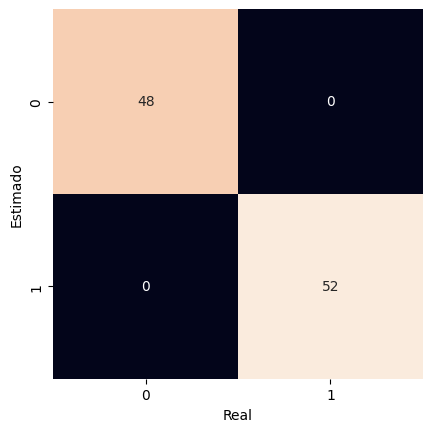

In [3]:
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()

#### 3. Plotando os detectores gerados com as amostras de treinamento.

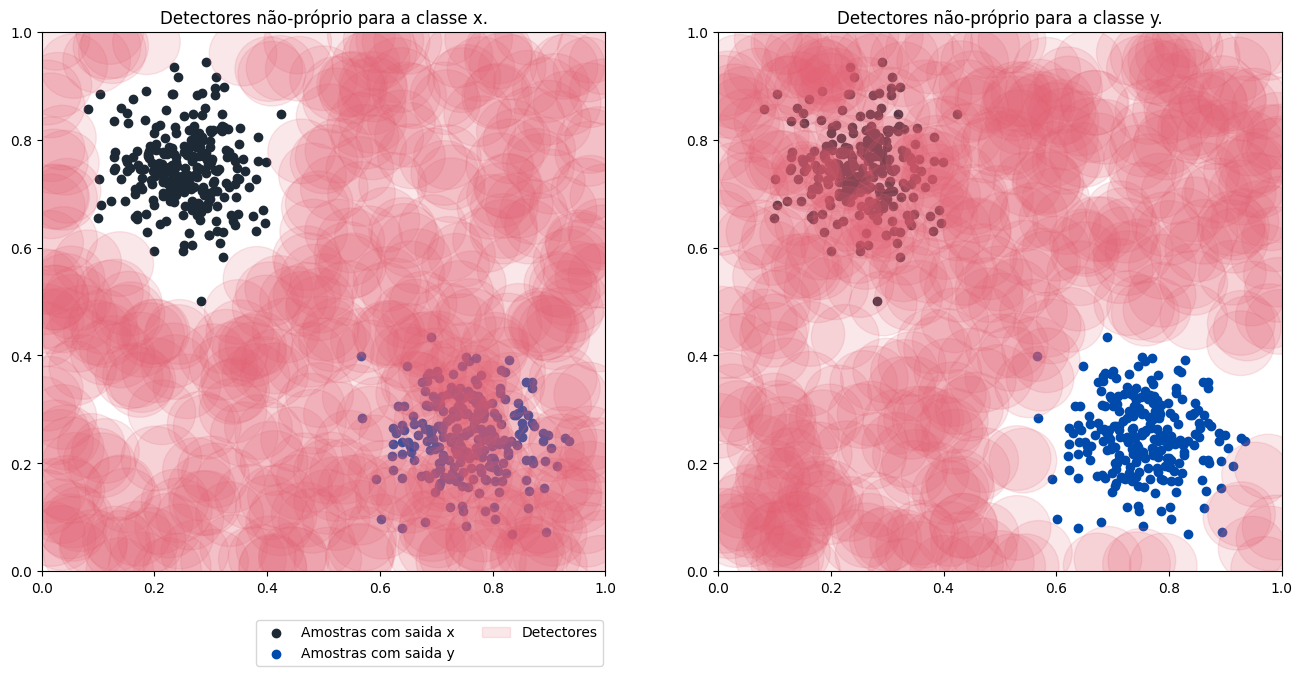

In [4]:
def plot_detectores(samples, train_x, nsa, rs):
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16, 7))
    labels = ['x', 'y']
    classesIndex = np.array((np.where(output == 0)[0] ,np.where(output == 1)[0]))

    for i in range(2):
        ax[i].axis([0, 1,0,1])
        ax[i].scatter(samples[classesIndex[0], 0], samples[classesIndex[0], 1], label='Amostras com saida x', color='#1d2a35')
        ax[i].scatter(samples[classesIndex[1], 0], samples[classesIndex[1], 1], label='Amostras com saida y', color='#004aab')
        ax[i].set_title(f'Detectores não-próprio para a classe {labels[i]}.')
        for k in range(len(nsa.detectors[i])):
            r = nsa.detectors[i][k][1] if len(nsa.detectors[i][k][:]) > 1 else nsa.r
            ax[i].add_patch(plt.Circle((nsa.detectors[i][k][0][0], nsa.detectors[i][k][0][1]), color='#e25f71', radius=(r), alpha=0.15, label='Detectores'))
    
        if rs > 0 and train_x is not None:
            for sample in samples[classesIndex[i]]:
                ax[i].add_patch(plt.Circle((sample[0], sample[1]), color='#04aa6d', radius=(rs), alpha=0.05, label='Raio da amostra.'))
        
    if rs > 0:
        legend = fig.legend(['Amostras com saida x', 'Amostras com saida y', 'Detectores', 'Raio da amostra.'], bbox_to_anchor=(0.48, 0.05), ncol=2)
        handles = legend.legendHandles
        handles[3].set_color('#04aa6d')
    else:
        fig.legend(['Amostras com saida x', 'Amostras com saida y', 'Detectores'], bbox_to_anchor=(0.48, 0.05), ncol=2)
    plt.show()

plot_detectores(samples, None, nsa, 0)

#### 4. Iniciando o modelo e aplicando-o em amostras geradas aleatoriamente para testar o desempenho do classificador raio variavel.

In [5]:
# Iniciando a classe.
nsa = RNSA(N=50, r=0.05, algorithm='V-detector', r_s=0.04, seed=1234)
# Gerando as amostras e saídas para o treinamento.
samples, output = make_blobs(n_samples=500 , cluster_std=0.07, center_box=([0.0, 1.0]), centers=[[0.25, 0.75], [0.75, 0.25]], random_state=1234) 
# Separando dados para treinamento e teste.
train_x, test_x, train_y, test_y = train_test_split(samples, output, test_size=0.2)

# Efetuando o treinamento: 
nsa.fit(X=train_x, y=train_y)
# Efetuando a previsão:: 
prev = nsa.predict(X=test_x)
# Mostrando a acurácia das previsões para os dados reais.
print(f"A acuracia é {accuracy_score(prev, test_y)}")
print(classification_report(test_y, prev))

✔ Non-self detectors for classes (0, 1) successfully generated:  ┇██████████┇ 100/100 detectors


A acuracia é 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



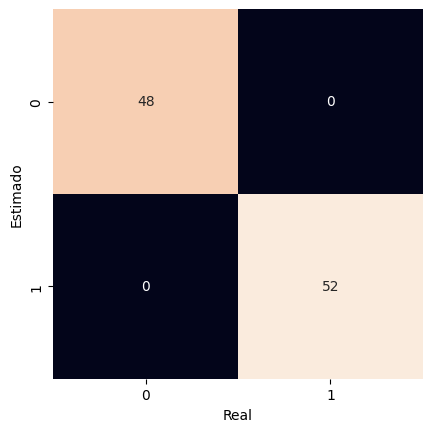

In [6]:
# Gerando a matriz de confusão e plotando de forma gráfica.
mat = confusion_matrix(y_true=test_y, y_pred=prev)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimado')
plt.show()

#### 5. Plotando os detectores gerados com as amostras de treinamento.

C:\Users\jpsil\AppData\Local\Temp\ipykernel_13988\1104242179.py:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


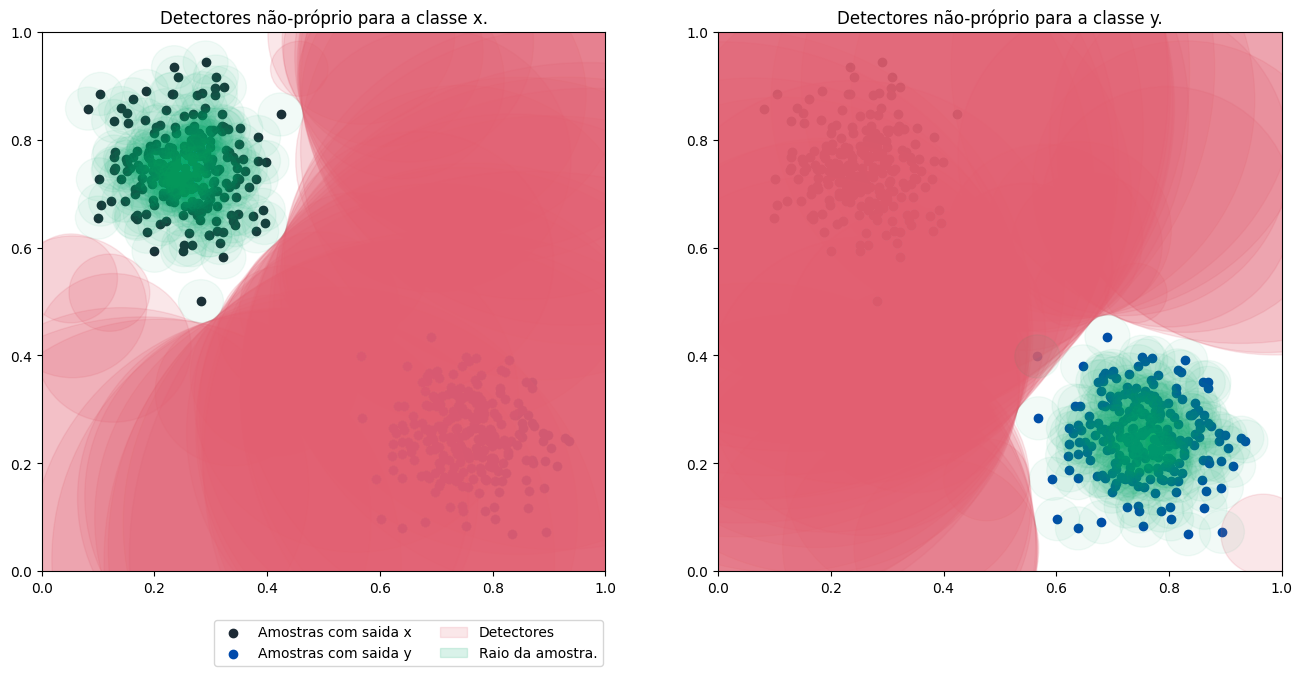

In [7]:
plot_detectores(samples, train_x, nsa, 0.04)